**AIE21128**

Lab 8  -- Question 1

A1.Use LSTM, Bi-LSTM networks for speech recognition.Use STFT/ STCT, MFCC & LPC coefficients.

In [20]:
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

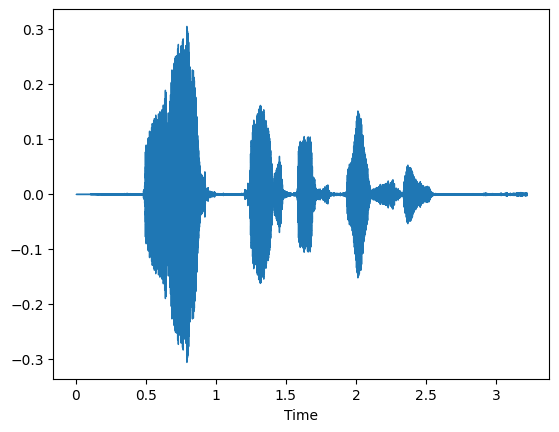

In [23]:
audio_signal = 'Audio.wav'
y,sr = librosa.load(audio_signal)
librosa.display.waveshow(y)

In [24]:
import numpy as np
import librosa
import librosa.display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed, Dropout


# Preprocessing
# Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(y))

# Mel-Frequency Cepstral Coefficients (MFCC)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Linear Predictive Coding (LPC)
# You may need to use a different library for LPC extraction, as librosa doesn't provide direct support
# Alternatively, you can skip LPC for now if it's not crucial for your speech recognition task

# Prepare input data for the LSTM model
X = mfccs.T  # Transpose the MFCC matrix to match the shape expected by the LSTM model
X = X.reshape(X.shape[0], X.shape[1], 1)  # Add channel dimension

# Define LSTM model
num_classes = 10  # Replace with the actual number of classes in your dataset
model = Sequential([
    Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X.shape[1], 1)),
    TimeDistributed(Dense(units=64, activation='relu')),
    Dropout(0.2),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    TimeDistributed(Dense(units=num_classes, activation='softmax'))
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Now you can proceed with training the model, evaluating its performance, and using it for speech recognition tasks

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 13, 256)           133120    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 13, 64)            16448     
 ributed)                                                        
                                                                 
 dropout (Dropout)           (None, 13, 64)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 13, 128)           66048     
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 13, 10)            1290      
 stributed)                                             